<a href="https://colab.research.google.com/github/EriveltoSilva/IncomeMachineLearningClassifier/blob/main/IncomeMachineLearningClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Machine Learning Classifier Based on Census Data


## Project Goals
The main goals of this project are:

- **Data Preprocessing**: Cleaning and preparing the dataset to ensure high-quality inputs for the model.
- **Exploratory Data Analysis (EDA)**: Identifying patterns, correlations, and feature importance.
- **Feature Engineering:** Transforming and selecting the most relevant attributes to improve model performance.
- **Model Selection & Training:** Experimenting with various classification algorithms to achieve the best accuracy.
- **Evaluation & Optimization:** Measuring model performance using metrics such as accuracy, precision, recall, and F1-score, and fine-tuning hyperparameters for better results.

##Expected Outcome
A high-accuracy classification model capable of effectively predicting income levels based on census data, providing insights into the most influential socioeconomic factors.

In [177]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#algorithm evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [178]:
dataset = pd.read_csv("https://raw.githubusercontent.com/EriveltoSilva/IncomeMachineLearningClassifier/refs/heads/main/resources/census.csv")
dataset

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data visualization

In [179]:
dataset.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [180]:
dataset.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [181]:
dataset.tail(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [182]:
dataset.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [183]:
np.unique(dataset['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

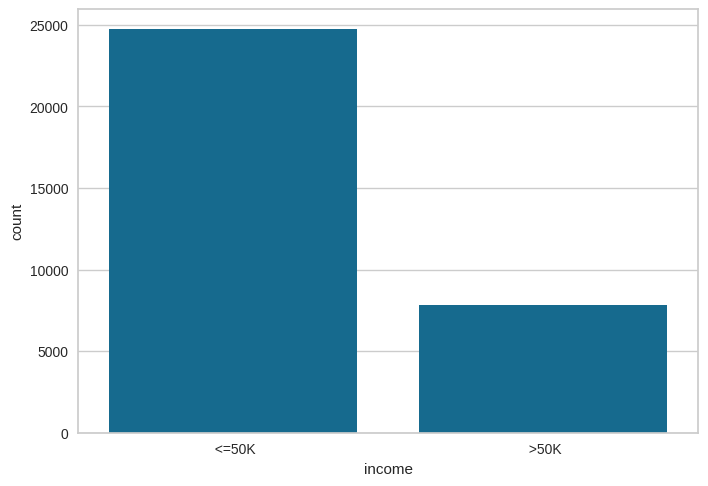

In [184]:
sns.countplot(x = dataset['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

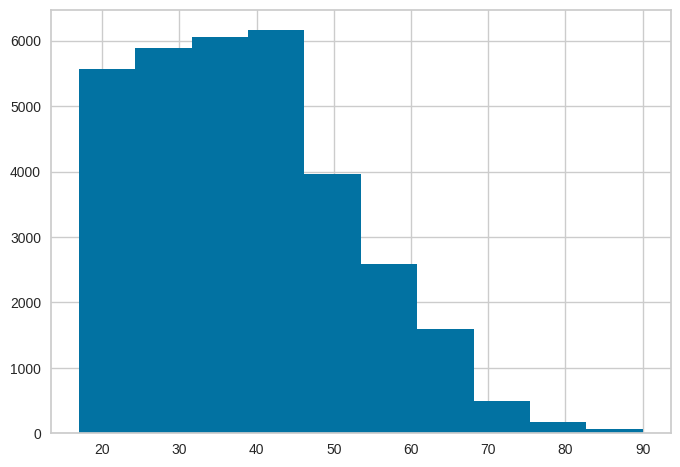

In [185]:
plt.hist(x = dataset['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

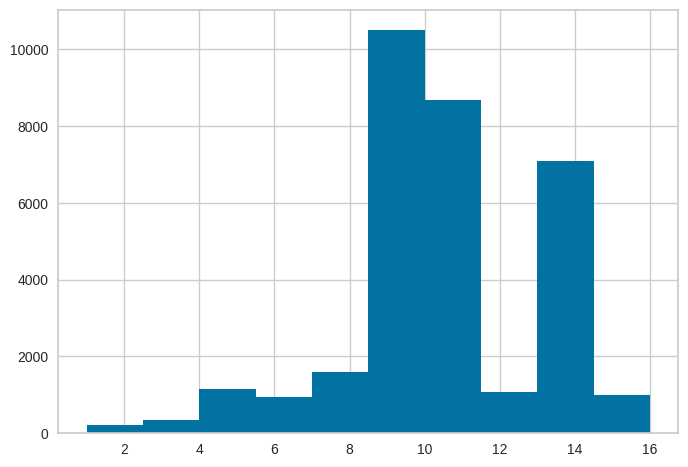

In [186]:
plt.hist(x= dataset['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

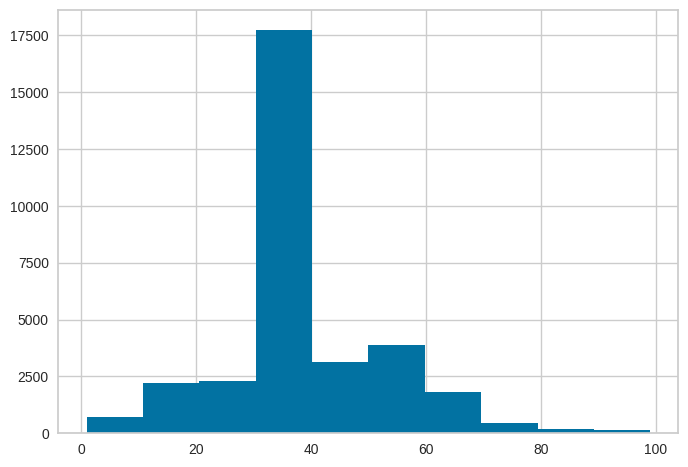

In [187]:
plt.hist(x= dataset['hour-per-week'])

In [188]:
grafico = px.treemap(dataset, path=['workclass', 'age'])
grafico.show()

In [189]:
grafico = px.treemap(dataset, path=['occupation', 'relationship'])
grafico.show()

In [190]:
grafico = px.treemap(dataset, path=['sex','education'])
grafico.show()

In [191]:
grafico = px.parallel_categories(dataset, dimensions=['occupation', 'relationship'])
grafico.show()

In [192]:
grafico = px.parallel_categories(dataset, dimensions=['education','income'])
grafico.show()

In [193]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

## Handling Categorical attribute

### LabelEncoder
Converter variaveis categoricas nominais em valores números que podem vir a ser processados pelos algoritmos de machine learning

In [194]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [195]:
X[:,1] = label_encoder_workclass.fit_transform(X[:,1])
X[:,3] = label_encoder_education.fit_transform(X[:,3])
X[:,5] = label_encoder_workclass.fit_transform(X[:,5])
X[:,6] = label_encoder_workclass.fit_transform(X[:,6])
X[:,7] = label_encoder_workclass.fit_transform(X[:,7])
X[:,8] = label_encoder_workclass.fit_transform(X[:,8])
X[:,9] = label_encoder_workclass.fit_transform(X[:,9])
X[:,13] = label_encoder_workclass.fit_transform(X[:,13])


In [196]:
X[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### OneHotEncoder


In [197]:
len(np.unique(dataset["workclass"])), len(np.unique(dataset["education"]))

(9, 16)

In [198]:
one_hot_encoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder="passthrough") # remainder para manter os dados inalterados na nova tabela

In [199]:
X = one_hot_encoder_census.fit_transform(X).toarray()

In [200]:
X.shape


(32561, 108)

## Feature Scalling - Standardisation

In [201]:
scaler_census = StandardScaler()
X = scaler_census.fit_transform(X)
X

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## Division of training and test values

In [202]:
# test_size =0.15 significa 15% da base de dados para test, os outros 85% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [203]:
X_train.shape, y_train.shape # 27676 registos, 108 colunas

((27676, 108), (27676,))

In [204]:
X_test.shape, y_test.shape

((4885, 108), (4885,))

##Save the databases

In [205]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

In [206]:
with open('census.pkl', mode= 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [207]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

## Naive Bayes Classifier - 47.67%

In [208]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [209]:
predictions = naive_model.predict(X_test)
predictions

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [210]:
y_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [211]:
accuracy_score(y_test, predictions)

0.4767656090071648

0.4767656090071648

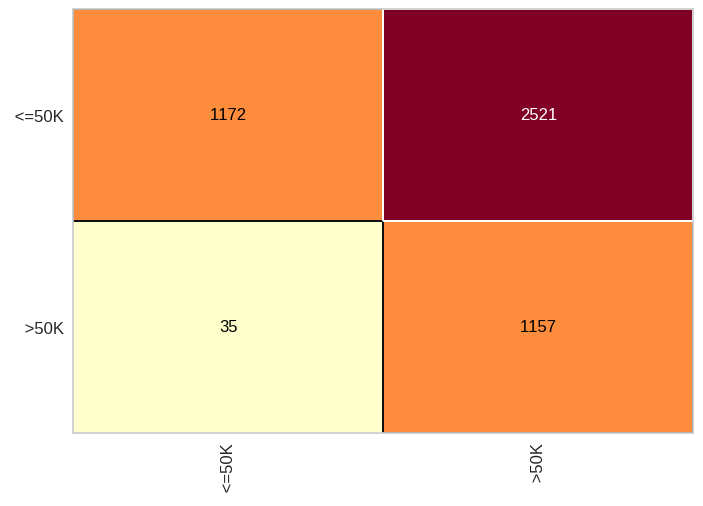

In [212]:
cm = ConfusionMatrix(naive_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [213]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



## Decision Tree Classifier - 81,04%

In [214]:
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [215]:
predictions = tree_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [216]:
accuracy_score(y_test, predictions)

0.8104401228249745

0.8104401228249745

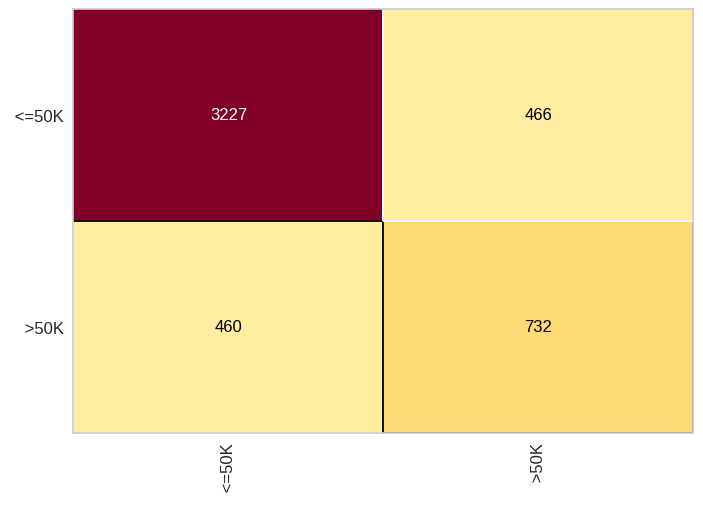

In [217]:
cm = ConfusionMatrix(tree_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [218]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Random Forest - 85,18%

In [219]:
random_forest_model = RandomForestClassifier(n_estimators=115, criterion = 'entropy', random_state = 0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=115, random_state=0)

In [220]:
predictions = random_forest_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [221]:
accuracy_score(y_test, predictions)

0.8517911975435005

0.8517911975435005

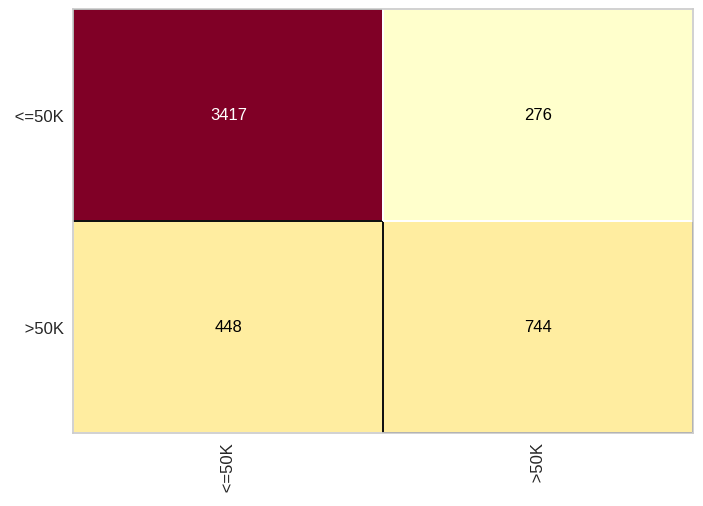

In [222]:
cm = ConfusionMatrix(random_forest_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [223]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# KNN (K-Nearest Neighbor) - 82.90%

In [224]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [225]:
predictions = knn_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [226]:
accuracy_score(y_test, predictions)

0.8290685772773797

0.8290685772773797

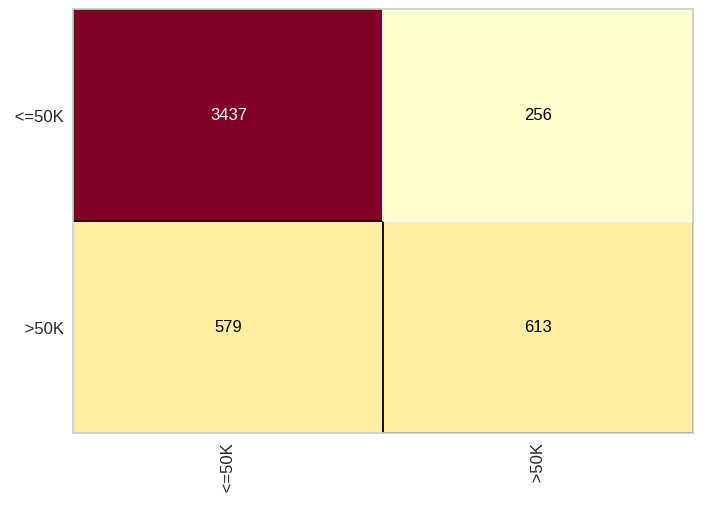

In [227]:
cm = ConfusionMatrix(knn_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [228]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# Regression Logistic - 84.97%

In [229]:
logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [230]:
predictions = logistic_regression_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [231]:
accuracy_score(y_test, predictions)

0.8497441146366428

0.8497441146366428

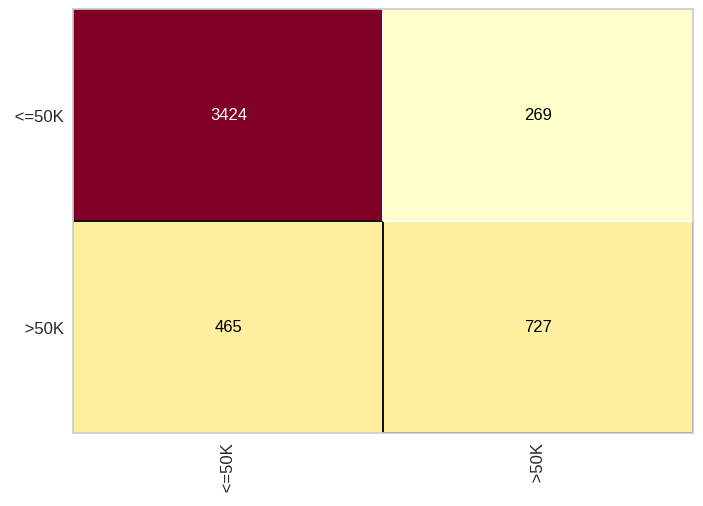

In [232]:
cm = ConfusionMatrix(logistic_regression_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [233]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



## SVM(Support Vector Machines) -  



In [234]:
svm_model = SVC(kernel="linear", random_state=1)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [235]:
predictions = svm_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [236]:
accuracy_score(y_test, predictions)

0.8507676560900717

0.8497441146366428

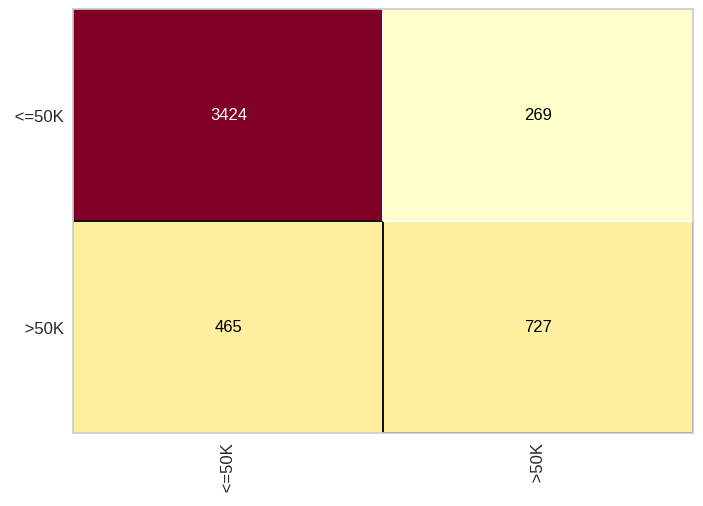

In [237]:
cm = ConfusionMatrix(logistic_regression_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [238]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



## Neural Network - 81.56%

Number of Neuron in Hidden Layes = (Nº of Entries + Nº of Neuron in Output Layer) /2
Number of Neuron in Hidden Layes = (108+1)/2 = 54.5.

Architecture: 3 --> 55 --> 55 --> 1

But with 2 neuron in hidden layer results wasn't just fine, so, it was changed to 100 neurons.

In [243]:
neural_network_model = MLPClassifier(verbose=False,
                                     max_iter=1380,
                                     tol=0.0000100,
                                     solver="adam",
                                     activation="relu",
                                     hidden_layer_sizes=(100, 100)
                                     )
neural_network_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1380, tol=1e-05)

In [244]:
predictions = neural_network_model.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [245]:
accuracy_score(y_test, predictions)

0.8157625383828045

In [242]:
m = ConfusionMatrix(neural_network_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

0.8497441146366428